# Titanic Dataset Predictions with logistic Regression

In [4]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [5]:
#Load data

train_data = pd.read_csv('traindata_clean.csv')
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


## Feature Selection    

In order to select features that have an impact on the ground truth we will draw a correlation Matrix and select the ones with the largest correlation

<AxesSubplot: >

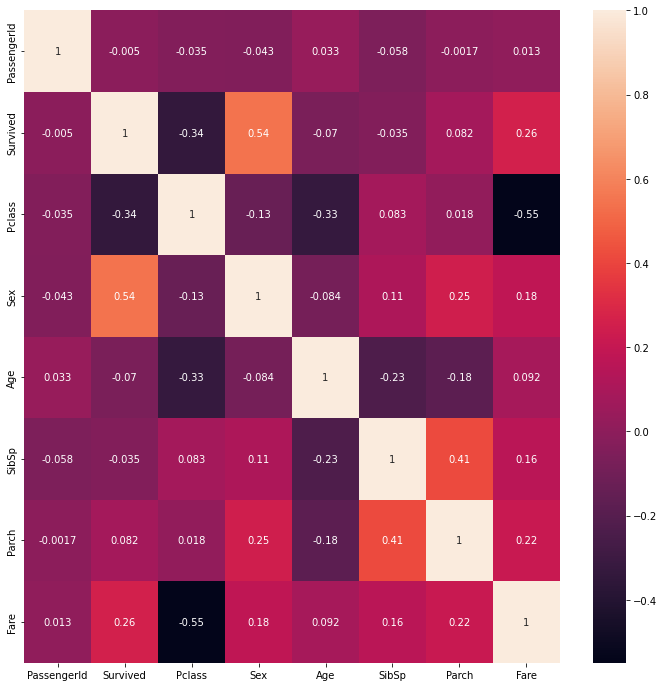

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), annot=True)

In [7]:
#Feature Selection and train/test split

features = ['Sex','Fare', 'Pclass', 'Age']

X = train_data[features]
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
# Create and train the Model

model = linear_model.LogisticRegression()

#Training

model.fit(X_train, y_train)


# Make Predictions

pred = model.predict(X_test).round()

In [9]:
result = pd.DataFrame({'truth' : y_test, 'predicted' : pred})

result["correct"] = np.where(result.truth == result.predicted, 1, 0)

accuracy = result.correct.sum()/result.shape[0]

print(f" Accuracy: {(accuracy*100).round(2)}%")

 Accuracy: 79.89%
